In [85]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [86]:
data = pd.read_csv('train.csv')

In [87]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [89]:
Y_train

array([1, 8, 5, ..., 4, 2, 4])

In [90]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    Z -= np.max(Z, axis=0)  # Subtract max value for numerical stability
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z1, A1, A2, W2, X, Y, m):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, 1)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, 1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * np.reshape(db1, (10,1))
    W2 -= alpha * dW2
    b2 -= alpha * np.reshape(db2, (10,1))
    return W1, b1, W2, b2




In [91]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, A2, W2, X, Y, m)
        # updating weights
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i % 10 == 0):
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [92]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[0 0 0 ... 0 0 0] [1 8 5 ... 4 2 4]
Accuracy:  0.11165853658536586
Iteration:  10
[5 1 4 ... 1 0 6] [1 8 5 ... 4 2 4]
Accuracy:  0.18229268292682926
Iteration:  20
[3 8 4 ... 1 0 6] [1 8 5 ... 4 2 4]
Accuracy:  0.24792682926829268
Iteration:  30
[1 8 4 ... 1 0 6] [1 8 5 ... 4 2 4]
Accuracy:  0.2995609756097561
Iteration:  40
[1 8 4 ... 1 0 6] [1 8 5 ... 4 2 4]
Accuracy:  0.3444634146341463
Iteration:  50
[1 8 4 ... 1 0 6] [1 8 5 ... 4 2 4]
Accuracy:  0.3856341463414634
Iteration:  60
[1 8 4 ... 1 0 6] [1 8 5 ... 4 2 4]
Accuracy:  0.44129268292682927
Iteration:  70
[1 8 4 ... 5 0 6] [1 8 5 ... 4 2 4]
Accuracy:  0.4806829268292683
Iteration:  80
[1 8 1 ... 7 0 6] [1 8 5 ... 4 2 4]
Accuracy:  0.5177073170731707
Iteration:  90
[1 8 1 ... 7 7 4] [1 8 5 ... 4 2 4]
Accuracy:  0.5529512195121952
Iteration:  100
[1 8 1 ... 7 7 4] [1 8 5 ... 4 2 4]
Accuracy:  0.5813170731707317
Iteration:  110
[1 8 1 ... 7 7 4] [1 8 5 ... 4 2 4]
Accuracy:  0.6036585365853658
Iteration:  120
[1 8 1 

In [93]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


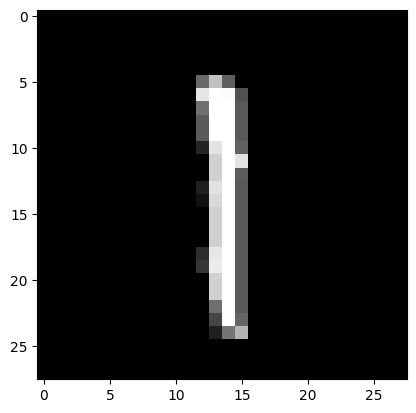

Prediction:  [8]
Label:  8


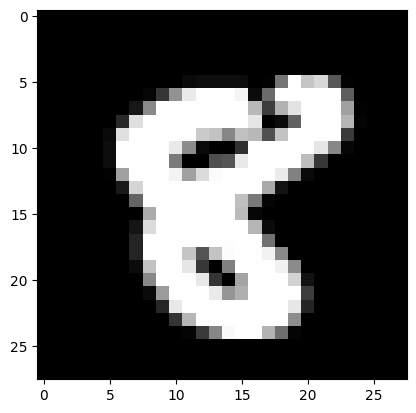

Prediction:  [5]
Label:  5


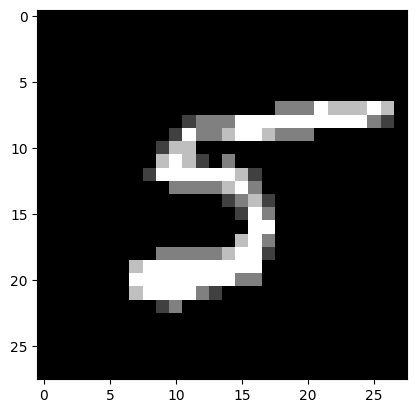

Prediction:  [8]
Label:  8


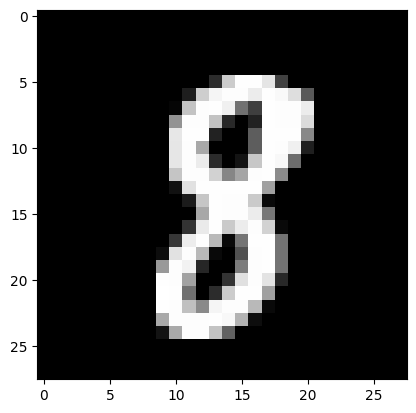

In [94]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [95]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 0 9 3 9 9 7 9 9 3 3 9 0 8 7 3 9 1 8 6 2 1 3 3 4 0 5 0 9 4 8 3 0 0 3 6 8
 8 1 9 0 5 9 6 0 0 9 2 3 1 0 8 7 3 3 9 2 8 1 2 0 1 3 7 7 3 2 1 5 5 9 7 5 6
 5 3 8 2 2 8 3 4 1 6 1 7 8 5 6 8 2 7 6 6 7 1 3 0 4 5 4 1 4 4 4 2 2 2 8 3 8
 2 0 2 5 7 1 2 3 6 7 4 3 2 6 1 2 0 0 2 9 2 3 0 8 1 7 4 3 1 9 6 4 1 1 6 0 2
 9 7 0 7 5 6 3 2 9 1 1 7 4 6 2 3 9 8 4 3 0 0 4 0 8 9 4 1 7 0 8 2 8 2 3 7 0
 3 0 0 2 9 7 3 5 1 9 5 1 6 2 4 6 7 5 1 9 4 6 8 2 9 6 3 6 3 0 9 8 7 2 2 1 8
 2 4 5 3 9 1 1 0 1 7 7 9 5 3 7 3 4 3 1 4 3 0 1 6 2 1 1 7 2 1 8 3 7 6 4 3 1
 2 7 3 9 0 8 2 2 0 3 4 0 9 0 7 7 1 6 4 4 8 9 1 2 8 1 4 2 3 4 2 3 4 0 9 7 4
 6 9 4 9 7 5 7 9 3 4 1 8 5 0 0 6 1 5 5 6 4 7 7 1 9 7 8 8 4 0 8 7 2 7 5 2 7
 2 8 6 5 7 2 5 7 6 4 7 8 7 2 3 8 7 5 2 2 3 4 0 5 1 1 7 5 0 2 8 5 1 8 7 9 2
 1 1 0 0 2 0 4 1 9 9 5 6 9 7 9 8 2 6 1 1 4 0 9 8 0 3 9 4 1 3 7 5 9 0 8 0 3
 6 2 6 2 2 7 8 0 8 4 5 1 7 8 2 2 1 3 7 9 7 0 6 0 5 1 3 3 6 3 7 4 0 3 7 7 0
 2 6 1 2 4 8 2 8 6 0 1 2 6 6 9 9 0 4 5 9 6 7 9 0 9 5 0 4 5 1 2 5 2 8 6 8 9
 1 5 9 8 6 3 1 3 1 8 2 1 

0.833